In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from oiffile import imread
from PIL import Image
import random
import skimage
from skimage.transform import resize
import matplotlib
import glob
from scipy import stats
import time

In [2]:
medianMatrix = np.zeros((3,16,203))
stdDevMatrix = np.zeros((3,16,203))
medianAbsDevMatrix = np.zeros((3,16,203))
meanMatrix = np.zeros((3,16,203))
maxMatrix = np.zeros((3,16,203))
minMatrix = np.zeros((3,16,203))

In [3]:
start = time.time()

for i in range(1,204):
    if i<10:
        n = '000%s' % (i)
    elif i <100:
        n = '00%s' % (i)
    else:
        n = '0%s' % (i)
                
    p = '/Volumes/BACKUP/pcp2cre_syptom_568_mglur1_1to200_647_1to250_vgat_1to200_488_1to250/FV10__20190507_224650_flocculusA/Track%s' % (n)
    fdir = glob.glob(p)
    name = 'Image%s_01.oib' % (n)
    image = imread(os.path.join(fdir[0],name))
        
    for j in range(0,16):
        imslice = image[:,j,:,:].transpose(1,2,0)
        
        for k in range(0,3):
            medianMatrix[k][j][i-1] = np.median(imslice[:,:,k])
            stdDevMatrix[k][j][i-1] = np.std(imslice[:,:,k])
            medianAbsDevMatrix[k][j][i-1] = stats.median_absolute_deviation(imslice[:,:,k], axis=None)
            meanMatrix[k][j][i-1] = np.mean(imslice[:,:,k])
            maxMatrix[k][j][i-1] = np.amax(imslice[:,:,k])
            minMatrix[k][j][i-1] = np.amin(imslice[:,:,k])    

end = time.time()
print(end - start)

522.3978366851807


In [97]:
np.save("../datasets/flocculusA/medianMatrix.npy", medianMatrix)
np.save("../datasets/flocculusA/stdDevMatrix.npy", stdDevMatrix)
np.save("../datasets/flocculusA/medianAbsDevMatrix.npy", medianAbsDevMatrix)
np.save("../datasets/flocculusA/meanMatrix.npy", meanMatrix)
np.save("../datasets/flocculusA/maxMatrix.npy", maxMatrix)
np.save("../datasets/flocculusA/minMatrix.npy", minMatrix)

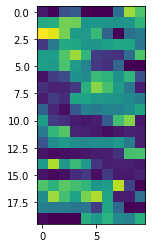

In [91]:
plt.imshow(stdDevMatrix[2][10][:200].reshape(20,10))
plt.show()

In [58]:
medianTotal = np.zeros((3,16))
stdDevTotal = np.zeros((3,16))
medianAbsDevTotal = np.zeros((3,16))
meanTotal = np.zeros((3,16))
maxTotal = np.zeros((3,16))
minTotal = np.zeros((3,16))

for d in range(0,16):
    for h in range(0,3):
        medianTotal[h][d] = np.median(medianMatrix[h][d])
        stdDevTotal[h][d] = np.mean(stdDevMatrix[h][d])
        medianAbsDevTotal[h][d] = np.mean(medianAbsDevMatrix[h][d])
        meanTotal[h][d] = np.mean(meanMatrix[h][d])
        maxTotal[h][d] = np.median(maxMatrix[h][d])
        minTotal[h][d] = np.median(minMatrix[h][d])

In [100]:
np.save("../datasets/flocculusA/medianTotal.npy", medianTotal)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


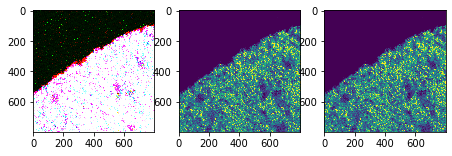

In [103]:
x=random.randint(1,203)

for i in range(x,x+1):
    if i<10:
        n = '000%s' % (i)
    elif i <100:
        n = '00%s' % (i)
    else:
        n = '0%s' % (i)
                
    p = '/Volumes/BACKUP/pcp2cre_syptom_568_mglur1_1to200_647_1to250_vgat_1to200_488_1to250/FV10__20190507_224650_flocculusA/Track%s' % (n)
    fdir = glob.glob(p)
    name = 'Image%s_01.oib' % (n)
    image = imread(os.path.join(fdir[0],name))
    
    y=random.randint(0,15)
    
    for j in range(y,y+1):
        imslice = image[:,j,:,:].transpose(1,2,0)
        
        im3 = imslice[:,:,0]/(.5*medianTotal[0][j])
        im3 = imslice[:,:,1]/(.5*medianTotal[1][j])
        im3 = imslice[:,:,2]/(.5*medianTotal[2][j])
        
        im333 = imslice[:,:,0]/(medianTotal[0][j])
        im333 = imslice[:,:,1]/(medianTotal[1][j])
        im333 = imslice[:,:,2]/(medianTotal[2][j])
       
       
        plt.figure(figsize=(10,30))
        plt.subplot(1,4,1)
        plt.imshow(imslice)
        plt.subplot(1,4,2)
        plt.imshow(im3)
        plt.subplot(1,4,3)
        plt.imshow(im333)

In [79]:
print(x)
print(y)

204
6


In [106]:
with open("../datasets/imagesUsed.txt", "a") as fin:
    fin.write("append")